In [1]:
def compare(s):
    try:
        import pandas as pd
        rdf = pd.read_excel('reutersnews/'+s+'NewsSentiment.xlsx')
        ydf = pd.read_excel('yahoonews/'+s+'NewsSentiment.xlsx')

        rdf = rdf.drop(['Unnamed: 0','Article','Polarity','Subjectivity','neg','neu','pos'],axis=1)

        ydf = ydf.drop(['Unnamed: 0','Article','Polarity','Subjectivity','neg','neu','pos'],axis=1)

        rdf['date'] =  rdf['Datetime'].dt.date
        ydf['date'] =  ydf['Datetime'].dt.date

        def sync_dates(df):    
            mask = (df['Datetime'] > '2021-01-01') & (df['Datetime'] <= '2021-03-30')
            return df.loc[mask] 

        nrdf = sync_dates(rdf)
        nydf = sync_dates(ydf)

        adf = nydf.merge(nrdf,on='date',how='left')

        adf['compound_y'] = adf['compound_y'].fillna(adf['compound_y'].mean())

        def plot(df,s):
            ndf = adf.set_index('Datetime_x').resample('D')['compound_x'].mean().fillna(adf['compound_x'].mean()).plot(color='b', label='Yahoo')
            ndf.legend(loc="upper right")
            ndf.set_xlabel('Datetime')
            ndf.set_ylabel('Sentiment')
            ndf.set_title(s)
            ndf1 = adf.set_index('Datetime_x').resample('D')['compound_y'].mean().fillna(adf['compound_x'].mean()).plot(color='r', label='Reuters')
            ndf.legend(loc="upper right")

        plot(adf,s)
    except:
        print('File Not Found')
        pass

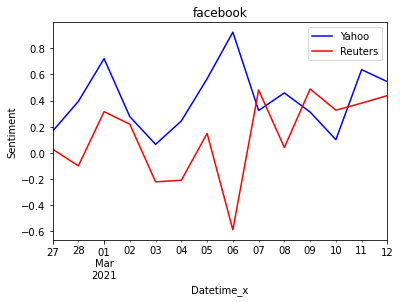

In [3]:
compare('facebook') #Enter name of company